# Shehu Alaba Rasheed
## Data science intern @ The Sparks Foundation

# The Sparks Foundation Internship

## Task 1

# Prediction Using Supervised ML

## Simple Regression Task


**This task involves creating a machine learning model that can predict percentage score of a student based on the numbers of hours used to study**  
[Data source](http://bit.ly/w-data)

Data Description

Hours- numbers of hours student studied for
Scores- percentage score of student

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='colorblind')

In [3]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Split the dataset into train and test set
* **The data has to be splited before anything is done on it, because us seeing all data before spliting it introduces data snooping bias**

In [5]:
train_set, test_set = train_test_split(data, test_size=0.2, shuffle=True, random_state=123)

In [9]:
data1 = train_set.copy()

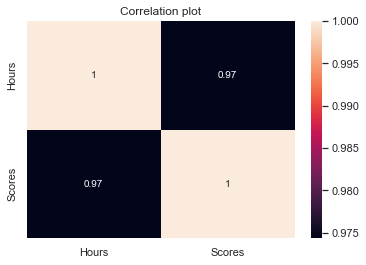

In [7]:
sns.heatmap(data1.corr(), annot=True)
plt.title('Correlation plot');

**NOte**
* The number of hours is highly positively correlated with Scores; i.e as hours of study increases the Score increases

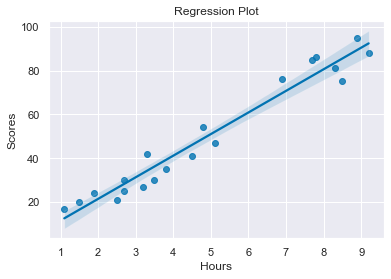

In [13]:
sns.regplot(data=data1, x='Hours', y='Scores')
plt.title('Regression Plot');

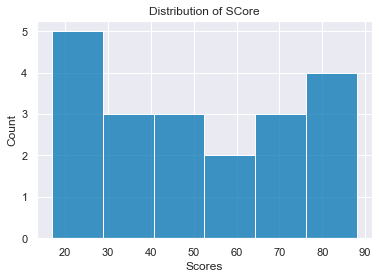

In [10]:
# Checking the distribution of score
sns.histplot(data=data1, x='Scores')
plt.title('Distribution of SCore');

**Note**
* The data is almost uniform distributed

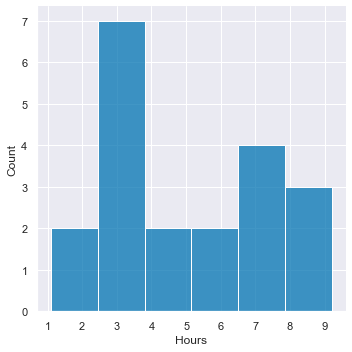

In [12]:
# Checking the distribution of Hours
sns.displot(data=data1, x='Hours')
plt.show();

**Most student study below 4 hours**

**Split data into X(independent Variable) and y(dependent Variable)**

In [14]:
X = data1.loc[:,['Hours']]
y = data1.loc[:,['Scores']]

# Model fitting

In [15]:
# Instantiate LinearRegression as model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
train_prediction = model.predict(X)
rmse_score = round(mean_squared_error(y, train_prediction) ** 0.5, 2)
print(f'The train set root_mean_squared_error is {rmse_score}')

The train set root_mean_squared_error is 5.5


# Model Evaluation

In [17]:
X_test = test_set.iloc[:, [0]]
y_test = test_set.iloc[:, [1]]

In [18]:
test_pred = model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5
print(f'The model root_mean_squared_error is {test_rmse}')

The model root_mean_squared_error is 5.155850704673393


**Note**
* The test set had a lower root_mean_squared_error of 5.16, hence the model didn't over fit
* The rmse_score of 5.16 means the predicted score is off the actual score by 5.16 on average

**New prediction**
* What will be the predicted score if a student study for 9.25hours/day

In [19]:
new_data = pd.DataFrame()
new_data['Hours'] = [9.25]
new_pred = model.predict(new_data)
new_data['Scores'] = new_pred
new_data

,Hours,Scores
0,9.25,91.511288


# Prediction for 9.25hours/day

* If a student read for 9.25hours/ day, he will have 91.51 score